In [43]:
%load_ext autoreload
%autoreload 2

import sys
import os
src_dir = './src'
for root, dirs, files in os.walk(src_dir):
    sys.path.append(os.path.abspath(root))


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load dataset
The dataset has been successfully loaded, displaying columns such as Time, Latitude, Longitude, and accelerometer/gyroscope readings (AccX, AccY, AccZ, GyX, GyY, GyZ).

In [44]:
from src.stages.data_load import data_load
df, config, logger= data_load('params.yaml')

# Display the dataframe to understand its structure
df.head()


2024-10-14 20:09:41,021 — DATA_LOAD — INFO — Set random seed: 42
2024-10-14 20:09:41,033 — DATA_LOAD — INFO — Loading original data from data/trips\57802403-2ab2-48be-8bc5-9d3610661405\2024-07-27_15.04.58_57802403-2ab2-48be-8bc5-9d3610661405_sensor_android_1.txt
2024-10-14 20:09:41,347 — DATA_LOAD — INFO — display original data from data/trips\57802403-2ab2-48be-8bc5-9d3610661405\2024-07-27_15.04.58_57802403-2ab2-48be-8bc5-9d3610661405_sensor_android_1.txt


,Time,Latitude,Longitude,AccX,AccY,AccZ,GyX,GyY,GyZ
0,0:00:00.00,-31.900127,115.775871,0.342,2.541,9.715,-0.248,0.266,0.043
1,0:00:00.07,-31.900127,115.775871,0.316,2.606,9.360,-0.248,0.266,0.043
2,0:00:00.12,-31.900127,115.775871,0.359,2.484,9.839,0.023,0.095,0.034
3,0:00:00.17,-31.900127,115.775871,0.230,2.585,9.308,0.023,0.095,0.034
4,0:00:00.23,-31.900127,115.775871,0.663,2.357,9.583,0.023,0.095,0.034


## Preprocessing: Cleaning and Preparation
The dataset has been successfully preprocessed, handling missing values and cleaning data types, with the updated data now including a label column.

In [45]:
from data_processing import preprocess_data
df = preprocess_data(df, config, logger)

df.head()

2024-10-14 20:09:44,109 — DATA_LOAD — INFO — Preprocessed dataset saved to data/raw/2024-07-27_15.04.58_57802403-2ab2-48be-8bc5-9d3610661405_sensor_android_1.txt
2024-10-14 20:09:44,109 — DATA_LOAD — INFO — Display preprocessed dataset from data/raw/2024-07-27_15.04.58_57802403-2ab2-48be-8bc5-9d3610661405_sensor_android_1.txt


,Latitude,Longitude,AccX,AccY,AccZ,GyX,GyY,GyZ,label
Time,,,,,,,,,
2024-10-14 00:00:00.000,-31.900127,115.775871,0.342,2.541,9.715,-0.248,0.266,0.043,None
2024-10-14 00:00:00.070,-31.900127,115.775871,0.316,2.606,9.360,-0.248,0.266,0.043,None
2024-10-14 00:00:00.120,-31.900127,115.775871,0.359,2.484,9.839,0.023,0.095,0.034,None
2024-10-14 00:00:00.170,-31.900127,115.775871,0.230,2.585,9.308,0.023,0.095,0.034,None
2024-10-14 00:00:00.230,-31.900127,115.775871,0.663,2.357,9.583,0.023,0.095,0.034,None


In [46]:
# The above code can also be executed using the following command.
# !python src/stages/data_load.py --config=params.yaml

# Extract features

## Resampling and Calculation
The code resamples the data and calculates distances and speeds for each time step(one second) in the dataset.

In [47]:
## Resampling and Calculation
# Resample the data and calculate distances and speed

from featurize import resample_and_calculate

df_resampled = resample_and_calculate(df, config, logger)

# Show the resampled and calculated data
df_resampled.head()


2024-10-14 20:09:44,603 — FEATURIZE — INFO — Load raw data


,Latitude,Longitude,AccX,AccY,AccZ,GyX,GyY,GyZ,label,distance_km,time_diff,speed_kmh
Time,,,,,,,,,,,,
2024-10-14 00:00:00,-31.900127,115.775871,0.226778,2.216500,9.676500,-0.073278,0.061778,-2.605556e-02,NaN,NaN,NaN,0.000000
2024-10-14 00:00:01,-31.900127,115.775872,0.109111,2.371333,9.648333,0.026333,-0.010556,2.238889e-02,NaN,0.000022,1.0,0.080513
2024-10-14 00:00:02,-31.900128,115.775872,0.265222,2.288111,9.660278,0.000722,-0.002056,2.772222e-02,NaN,0.000087,1.0,0.314658
2024-10-14 00:00:03,-31.900129,115.775872,0.401222,2.395333,9.675167,-0.005556,-0.001778,3.854941e-19,NaN,0.000080,1.0,0.287344
2024-10-14 00:00:04,-31.900129,115.775872,0.392667,2.206889,9.715444,-0.036444,0.004500,-6.611111e-03,NaN,0.000043,1.0,0.153423


## Data Visualization: Unfiltered Trip Map Generation

In [48]:
from visualization import generate_trip_map

output_html_path = generate_trip_map(df_resampled, os.path.join(config['paths']['main_dir3'], config['data']['unfiltered_trip_html']), config)

print(f"HTML file generated at: {output_html_path}")

HTML file generated at: data/Generated_html\unfiltered_trip.html


In [49]:

# Display the map in the notebook
from IPython.display import IFrame
IFrame(output_html_path, width=1200, height=600)


- The code generates an interactive trip map with a speedometer simulation, visualizing the car's route and current speed.
- The beginning and end of the route contain invalid data and need to be trimmed.

## Data slicing

In [50]:
from featurize import slice_and_save_data

df_resampled_filtered = slice_and_save_data(df_resampled, config,logger)
# Show the filtered data
df_resampled_filtered.head()

2024-10-14 20:09:48,828 — DATA_LOAD — INFO — Filtered data saved to data/effective_trips\57802403-2ab2-48be-8bc5-9d3610661405\2024-07-27_15.04.58_57802403-2ab2-48be-8bc5-9d3610661405_sensor_android_1.txt


,Latitude,Longitude,AccX,AccY,AccZ,GyX,GyY,GyZ,label,distance_km,time_diff,speed_kmh
Time,,,,,,,,,,,,
2024-10-14 00:11:38,-31.899870,115.775005,3.647818,6.801909,-6.645455,0.000909,-0.007364,-0.006636,NaN,0.025093,1.0,90.335966
2024-10-14 00:11:39,-31.899849,115.774784,3.701818,6.863091,-6.545364,-0.000364,0.007727,0.006636,NaN,0.021067,1.0,75.840319
2024-10-14 00:11:40,-31.899840,115.774588,3.619600,6.943900,-6.470000,0.010600,0.023200,-0.005200,NaN,0.018504,1.0,66.615524
2024-10-14 00:11:41,-31.899841,115.774401,3.819333,6.669250,-6.813917,0.017750,0.001833,-0.009750,NaN,0.017671,1.0,63.614555
2024-10-14 00:11:42,-31.899848,115.774214,3.899500,6.678000,-6.710500,-0.000500,0.001300,0.000900,NaN,0.017620,1.0,63.432115


- Remove invalid data points from the beginning and end of the route, then saves the filtered dataset.

## Data Visualization: Filtered Trip Map Generation

In [51]:
from IPython.display import IFrame

output_path2 = generate_trip_map(df_resampled_filtered, os.path.join(config['paths']['main_dir3'], config['data']['filtered_trip_html']), config)

# Display the filtered map in the notebook
IFrame(output_path2, width=1200, height=600)


- This is the route with the invalid data at the start and end already trimmed.

## Multiple filtered Trip Map Visualization

In [52]:
## Multiple Trip Map Visualization

from map_generation import generate_multiple_trips_map


main_dir1 = config['paths']['main_dir1']
output_path3  = os.path.join(config['paths']['main_dir3'], config['data']['map_with_multiple_trips_different_colors_html'])

# Call the function to generate a map of multiple trips, each with a unique color
generate_multiple_trips_map(main_dir1, output_path3)

# Display the generated HTML map file in the Jupyter notebook
IFrame(output_path3, width=800, height=600)


Map created successfully with each trip in a different color! Saved to data/Generated_html\map_with_multiple_trips_different_colors.html


- This cell is responsible for loading the configuration parameters, generating a map of multiple trips
- with different colors based on GPS data, and displaying the resulting HTML map in the notebook.

## Loading, Merging, and Correcting Trip Data for Acceleration and Gyroscope Angles


In [53]:
from featurize import load_trip_data

df_resampled_filtered = load_trip_data(main_dir1,config['paths']['main_dir2'],config['data']['merged_trips'],logger)
df_resampled_filtered.head()


2024-10-14 20:10:08,566 — DATA_LOAD — INFO — df_resampled_filtered Dataset saved to data/Generated_data\merged_trips.csv


,Latitude,Longitude,AccX,AccY,AccZ,GyX,GyY,GyZ,label,distance_km,...,trip_id,acceleration_magnitude,gyroscope_magnitude,acceleration,Pitch_Angle,Roll_Angle,Yaw_Angle,Reoriented_AccX,Reoriented_AccY,Reoriented_AccZ
0,-32.021467,115.952663,8.093800,-1.835700,-5.126200,-0.005200,0.020100,0.017700,NaN,0.013496,...,2024-08-16_06.32.50_0353595d-c227-4d23-8d89-4e...,9.754861,0.027283,0.000000,-0.978605,-2.797719,-0.223030,-8.158639,-3.561601,3.988599
1,-32.021371,115.952554,8.121091,-2.064818,-5.118545,-0.002455,-0.008545,0.034091,NaN,0.014855,...,2024-08-16_06.32.50_0353595d-c227-4d23-8d89-4e...,9.819119,0.035231,4.893369,-0.972903,-2.755412,-0.248695,-8.190150,-3.484160,4.146947
2,-32.021263,115.952438,7.960300,-2.585600,-5.055300,0.034800,0.006400,0.045700,NaN,0.016237,...,2024-08-16_06.32.50_0353595d-c227-4d23-8d89-4e...,9.777922,0.057797,4.973444,-0.944678,-2.708735,-0.258777,-8.069818,-3.668618,4.126384
3,-32.021158,115.952331,7.799100,-2.600500,-4.849400,0.022200,0.011900,-0.016700,NaN,0.015402,...,2024-08-16_06.32.50_0353595d-c227-4d23-8d89-4e...,9.544907,0.030222,-3.005700,-0.933953,-2.680756,-0.291183,-7.916888,-3.311808,4.178523
4,-32.021061,115.952228,8.077200,-2.683700,-4.902100,0.035400,-0.018400,0.030900,NaN,0.014556,...,2024-08-16_06.32.50_0353595d-c227-4d23-8d89-4e...,9.822117,0.050463,-3.046404,-0.915870,-2.684042,-0.275925,-8.112324,-3.442585,4.337373


- Add new features:
    - Acceleration magnitude: Euclidean norm of AccX, AccY, and AccZ
    - Gyroscope magnitude: : Euclidean norm of GyX, GyY, and GyZ
    - Acceleration (rate of change): the difference in speed divided by time
- Using Kalman filtering to obtain: Pitch_Angle, Roll_Angle, Yaw_Angle
- Using matrix transformation to obtain: Reoriented_AccX, Reoriented_AccY, Reoriented_AccZ
- Merge all the trimmed routes.

## Processing and Saving Intersection Data for Trip Analysis
This code identifies and processes intersections within trip data, then saves the updated intersection information as a CSV file.

In [54]:
from visualization import load_map_configurations

(intersections_df, intersections_no_signal_df, traffic_signal_df, _, _, _, 
 _, _, _, _) = load_map_configurations(config)
print("intersections_df => the intersection.csv dataset;")
print("intersections_no_signal_df => the intersection.csv dataset without traffic signal;")
print("traffic_signal_df => the Traffic_Signal_Sites.csv dataset ;")

intersections_df => the intersection.csv dataset;
intersections_no_signal_df => the intersection.csv dataset without traffic signal;
traffic_signal_df => the Traffic_Signal_Sites.csv dataset ;


In [55]:

# from intersection_analysis import calculate_bounding_box, filter_intersections_within_bbox, find_nearest_intersections, extract_intersection_range, process_intersections
# from visualization import load_map_configurations
from featurize import process_and_save_intersections


# !important!!!!!!
# choose what datasets you want to analyse: intersections_df/intersections_no_signal_df/traffic_signal_df
df_resampled_filtered, intersections_df_new = process_and_save_intersections(df_resampled_filtered, intersections_no_signal_df, config, config['paths']['main_dir2'], logger)
df_resampled_filtered.head()



2024-10-14 20:10:13,703 — DATA_LOAD — INFO — intersections_df_new Dataset saved to data/Generated_data\intersections.csv
2024-10-14 20:10:15,292 — DATA_LOAD — INFO — df_resampled_filtered Dataset saved to data/Generated_data\df_resampled_filtered.csv


,Latitude,Longitude,AccX,AccY,AccZ,GyX,GyY,GyZ,label,distance_km,...,acceleration_magnitude,gyroscope_magnitude,acceleration,Pitch_Angle,Roll_Angle,Yaw_Angle,Reoriented_AccX,Reoriented_AccY,Reoriented_AccZ,intersection
52,-32.017083,115.947772,7.791412,-0.829235,-6.128176,0.167882,-0.037059,-0.037294,NaN,0.136267,...,9.947275,0.175922,-20.000000,-0.121189,-2.380329,-0.795097,-2.176318,-0.014659,9.706271,174862
53,-32.017111,115.947703,7.488923,-2.096154,-6.052615,0.089385,-0.027923,0.006308,NaN,0.007209,...,9.854541,0.093857,-20.000000,-0.110898,-2.446299,-0.739714,-3.366781,-0.654775,9.238400,174862
54,-32.017143,115.947632,7.804000,-2.460300,-5.505300,0.018000,-0.007300,-0.024700,NaN,0.007647,...,9.862242,0.031423,1.576198,-0.170907,-2.479067,-0.720748,-4.526983,-0.496742,8.747771,None
55,-32.017172,115.947589,8.156222,-2.714778,-4.681556,0.022778,0.006222,-0.000889,NaN,0.005124,...,9.788306,0.023629,-9.080979,-0.227738,-2.486472,-0.683555,-5.487572,-0.304335,8.099683,None
56,-32.017243,115.947521,8.427200,-2.718300,-4.496200,0.005900,-0.005500,-0.006400,NaN,0.010185,...,9.930895,0.010297,18.219134,-0.297128,-2.502040,-0.654004,-6.089076,-0.266061,7.840602,None


- Generate the dataset intersections_df_new corresponding to the intersections/ intersections_no_signal_df /traffic signals the car passed.
- Calculate the distance from each row of data to the intersection.

## Marking Points Near Intersections and Calculating Distance to Nearest Intersection


In [56]:

from proximity_analysis import mark_points_within_distance, calculate_nearest_intersections, calculate_distance_to_nearest
from haversine import haversine


df_within_30m = mark_points_within_distance(df_resampled_filtered, intersections_df_new, distance_threshold=0.03)

df_within_30m = calculate_distance_to_nearest(df_within_30m, intersections_df_new)

df_within_30m.head()



,Latitude,Longitude,AccX,AccY,AccZ,GyX,GyY,GyZ,label,distance_km,...,acceleration,Pitch_Angle,Roll_Angle,Yaw_Angle,Reoriented_AccX,Reoriented_AccY,Reoriented_AccZ,intersection,within_30m,distance_to_intersection
52,-32.017083,115.947772,7.791412,-0.829235,-6.128176,0.167882,-0.037059,-0.037294,NaN,0.136267,...,-20.000000,-0.121189,-2.380329,-0.795097,-2.176318,-0.014659,9.706271,174862,True,0.006661
53,-32.017111,115.947703,7.488923,-2.096154,-6.052615,0.089385,-0.027923,0.006308,NaN,0.007209,...,-20.000000,-0.110898,-2.446299,-0.739714,-3.366781,-0.654775,9.238400,174862,True,0.005961
54,-32.017143,115.947632,7.804000,-2.460300,-5.505300,0.018000,-0.007300,-0.024700,NaN,0.007647,...,1.576198,-0.170907,-2.479067,-0.720748,-4.526983,-0.496742,8.747771,None,True,0.011974
55,-32.017172,115.947589,8.156222,-2.714778,-4.681556,0.022778,0.006222,-0.000889,NaN,0.005124,...,-9.080979,-0.227738,-2.486472,-0.683555,-5.487572,-0.304335,8.099683,None,True,0.016977
56,-32.017243,115.947521,8.427200,-2.718300,-4.496200,0.005900,-0.005500,-0.006400,NaN,0.010185,...,18.219134,-0.297128,-2.502040,-0.654004,-6.089076,-0.266061,7.840602,None,True,0.027158


- This code marks GPS points within a 30-meter radius of intersections and calculates the distance to the nearest intersection for each data point.

## Processing Directional Distances to Nearest Intersections


In [57]:
# from directional_distance import compute_directional_distances, compute_directional_distance
from featurize import process_data

df_within_30m = process_data(df_within_30m, intersections_df_new, os.path.join(config['paths']['main_dir2'], config['data']['df_within_30m_csv']), config['paths']['main_dir2'],logger) 

df_within_30m.head()

2024-10-14 20:33:10,422 — DATA_LOAD — INFO — df_within_30m_csv Dataset saved to data/Generated_data\df_within_30m.csv


,Latitude,Longitude,AccX,AccY,AccZ,GyX,GyY,GyZ,label,distance_km,...,Yaw_Angle,Reoriented_AccX,Reoriented_AccY,Reoriented_AccZ,intersection,within_30m,distance_to_intersection,nearest_intersection,nearest_distance,directional_distance_to_intersection
52,-32.017083,115.947772,7.791412,-0.829235,-6.128176,0.167882,-0.037059,-0.037294,NaN,0.136267,...,-0.795097,-2.176318,-0.014659,9.706271,174862,True,0.006661,174862,0.006661,NaN
53,-32.017111,115.947703,7.488923,-2.096154,-6.052615,0.089385,-0.027923,0.006308,NaN,0.007209,...,-0.739714,-3.366781,-0.654775,9.238400,174862,True,0.005961,174862,0.005961,-0.005961
54,-32.017143,115.947632,7.804000,-2.460300,-5.505300,0.018000,-0.007300,-0.024700,NaN,0.007647,...,-0.720748,-4.526983,-0.496742,8.747771,None,True,0.011974,174862,0.011974,0.011974
55,-32.017172,115.947589,8.156222,-2.714778,-4.681556,0.022778,0.006222,-0.000889,NaN,0.005124,...,-0.683555,-5.487572,-0.304335,8.099683,None,True,0.016977,174862,0.016977,0.016977
56,-32.017243,115.947521,8.427200,-2.718300,-4.496200,0.005900,-0.005500,-0.006400,NaN,0.010185,...,-0.654004,-6.089076,-0.266061,7.840602,None,True,0.027158,174862,0.027158,0.027158


- This code calculates the nearest intersections and computes the directional distance to those intersections, then saves the processed data to a CSV file.

## Model Training and Visualization for Multiple Feature Sets


2024-10-14 20:33:13,605 — FEATURIZE — INFO — Load raw data
2024-10-14 20:33:13,721 — FEATURIZE — INFO — Filtered data saved to data/effective_trips\57802403-2ab2-48be-8bc5-9d3610661405\2024-07-27_15.04.58_57802403-2ab2-48be-8bc5-9d3610661405_sensor_android_1.txt
2024-10-14 20:33:24,263 — FEATURIZE — INFO — df_resampled_filtered Dataset saved to data/Generated_data\merged_trips.csv
2024-10-14 20:33:27,809 — FEATURIZE — INFO — intersections_df_new Dataset saved to data/Generated_data\intersections.csv
2024-10-14 20:33:30,227 — FEATURIZE — INFO — df_resampled_filtered Dataset saved to data/Generated_data\df_resampled_filtered.csv
2024-10-14 20:36:06,515 — FEATURIZE — INFO — df_within_30m_csv Dataset saved to data/Generated_data\df_within_30m.csv

Running data split for feature set index 0
2024-10-14 20:36:09,783 — DATA_SPLIT — INFO — Set random seed: 42
2024-10-14 20:36:09,783 — DATA_SPLIT — INFO — Loading data from data/Generated_data\df_within_30m.csv
2024-10-14 20:36:09,807 — DATA_SPLI

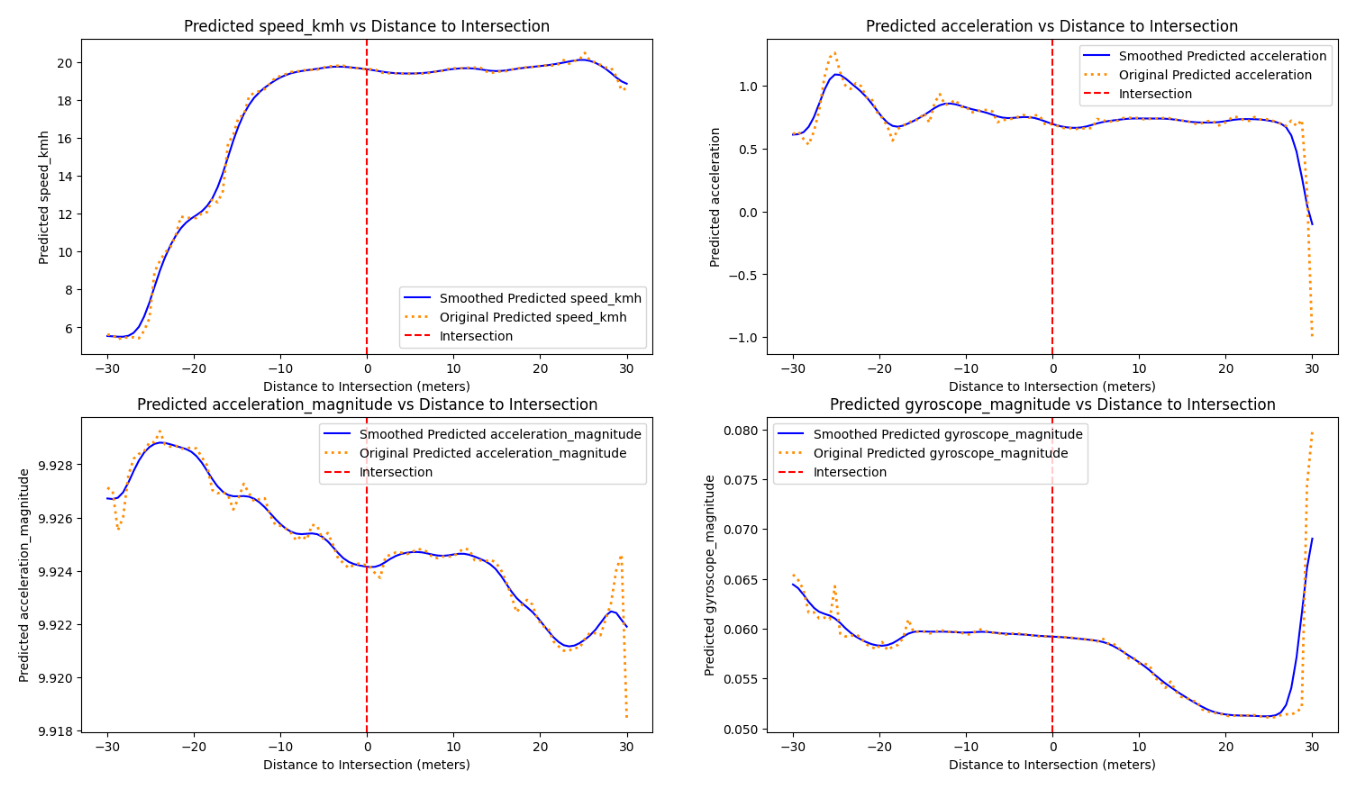

In [58]:
# !python src/stages/data_load.py --config=params.yaml
!python src/stages/featurize.py --config=params.yaml
!python src/stages/run_complete_pipeline1.py --config_path=params.yaml --save_dir=output

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img_path = "output/output_plot_target_04.png"
img = mpimg.imread(img_path)
plt.figure(figsize=(18, 10)) 
plt.imshow(img)
plt.axis('off')
plt.show()


The graphs show that:

1. **Speed** increases as the vehicle approaches the intersection, reaching a peak just before it, and slightly decreases after passing through.
2. **Acceleration** fluctuates significantly near the intersection, indicating alternating braking and accelerating behaviors.
3. **Acceleration Magnitude** shows small variations, suggesting overall stable motion intensity near the intersection.
4. **Gyroscope Magnitude** increases near the intersection, indicating directional changes, such as turns or steering adjustments. 

This reflects typical driving behavior of slowing down and adjusting direction near intersections.

## Weighted Random Forest Classifier for Predicting Stopping Probability Near Intersections

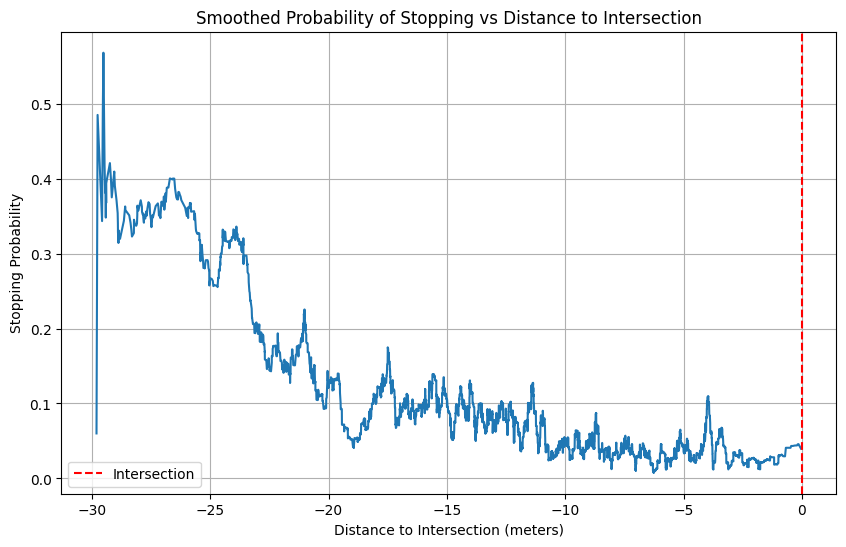

Accuracy: 0.9584026622296173

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1131
           1       0.89      0.34      0.49        71

    accuracy                           0.96      1202
   macro avg       0.92      0.67      0.73      1202
weighted avg       0.96      0.96      0.95      1202



In [59]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

# Define the new weight function
def calculate_weight(speed, acceleration_magnitude, acceleration, max_speed=40):
    # Initialize weight as an inverse function of speed
    weight = np.exp(-speed / max_speed)
    weight *= (1 + acceleration_magnitude)
    # weight *= (1 / (1 + np.abs(acceleration)))

    return weight


# Apply moving average to speed
window_size = 10
df_within_30m['speed_kmh_smooth'] = df_within_30m['speed_kmh'].rolling(window=window_size, min_periods=5).mean()

# Define stopping threshold
stopping_threshold = 5

# Initialize is_stopped column
df_within_30m['is_stopped'] = 0

mask = (df_within_30m['speed_kmh_smooth'] < stopping_threshold)

df_within_30m.loc[mask, 'is_stopped'] = 1

# Filter samples within 30m of intersection and only include directional_distance_to_intersection < 0
df_within_30m_filtered = df_within_30m[(df_within_30m['within_30m']) & (df_within_30m['directional_distance_to_intersection'] < 0)].copy()

# Calculate weight
df_within_30m_filtered['weight'] = calculate_weight(
    df_within_30m_filtered['speed_kmh_smooth'], 
    df_within_30m_filtered['acceleration_magnitude'], 
    df_within_30m_filtered['acceleration']
)

df_within_30m_filtered['weight'] = df_within_30m_filtered['weight'].fillna(1)


# Select features and target
features = ['acceleration_magnitude', 'gyroscope_magnitude', 'directional_distance_to_intersection', 
            'Pitch_Angle', 'Roll_Angle', 'Yaw_Angle', 'Reoriented_AccX', 'Reoriented_AccY', 'Reoriented_AccZ']
target = 'is_stopped'

# Split train and test sets
X = df_within_30m_filtered[features]
y = df_within_30m_filtered[target]
weights = df_within_30m_filtered['weight']
X_train, X_test, y_train, y_test, weights_train, weights_test = train_test_split(X, y, weights, test_size=0.2, random_state=42)

# Train weighted Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train, sample_weight=weights_train)

# Predict stopping probabilities
df_within_30m_filtered['stopping_prob'] = clf.predict_proba(X)[:, 1]

# Group by distance to intersection and calculate mean stopping probability
grouped_probs = df_within_30m_filtered.groupby('directional_distance_to_intersection')['stopping_prob'].mean()

smooth_window = 70

grouped_probs_smooth = grouped_probs.rolling(window=smooth_window, min_periods=1).mean()

plt.figure(figsize=(10, 6))
plt.plot(grouped_probs_smooth.index * 1000, grouped_probs_smooth.values)
plt.title("Smoothed Probability of Stopping vs Distance to Intersection")
plt.xlabel("Distance to Intersection (meters)")
plt.ylabel("Stopping Probability")
plt.axvline(x=0, color='r', linestyle='--', label='Intersection')
plt.legend()
plt.grid(True)
plt.savefig("output/smoothed_probability_vs_distance.png", format='png')
plt.show()

# Print model performance metrics
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


- The graph shows that the probability of stopping is higher at distances farther from the intersection and decreases as the vehicle approaches the intersection.

## Predict target values at intersections 
This code performs model training and evaluation for nine sets of features and targets, displaying the results in a 3x3 grid of subplots. Each subplot visualizes the predictions versus the actual values for each unique feature and target combination. The function handles data preparation, model training, and visualization for each set, with results organized into a grid layout to allow for easy comparison across different models and targets.


Running data split for feature set index 4
2024-10-14 20:36:42,822 — DATA_SPLIT — INFO — Set random seed: 42
2024-10-14 20:36:42,822 — DATA_SPLIT — INFO — Loading data from data/Generated_data\df_within_30m.csv
2024-10-14 20:36:42,848 — DATA_SPLIT — INFO — Using features: ['speed_kmh', 'acceleration', 'AccY', 'AccZ', 'acceleration_magnitude', 'gyroscope_magnitude', 'directional_distance_to_intersection', 'Pitch_Angle', 'Roll_Angle', 'Yaw_Angle', 'Reoriented_AccY', 'Reoriented_AccZ'] and target: Reoriented_AccX
2024-10-14 20:36:42,848 — DATA_SPLIT — INFO — Splitting data into train/test sets
2024-10-14 20:36:42,856 — DATA_SPLIT — INFO — Data splitting completed.
2024-10-14 20:36:42,936 — DATA_SPLIT — INFO — Train/test splits saved to data/split_data.
Scaler saved to data/split_data\scaler.pkl
2024-10-14 20:36:42,940 — DATA_SPLIT — INFO — Scaler saved to data/split_data.

Running model training for feature set index 4
2024-10-14 20:36:42,944 — MODEL_TRAINING — INFO — Starting model trai

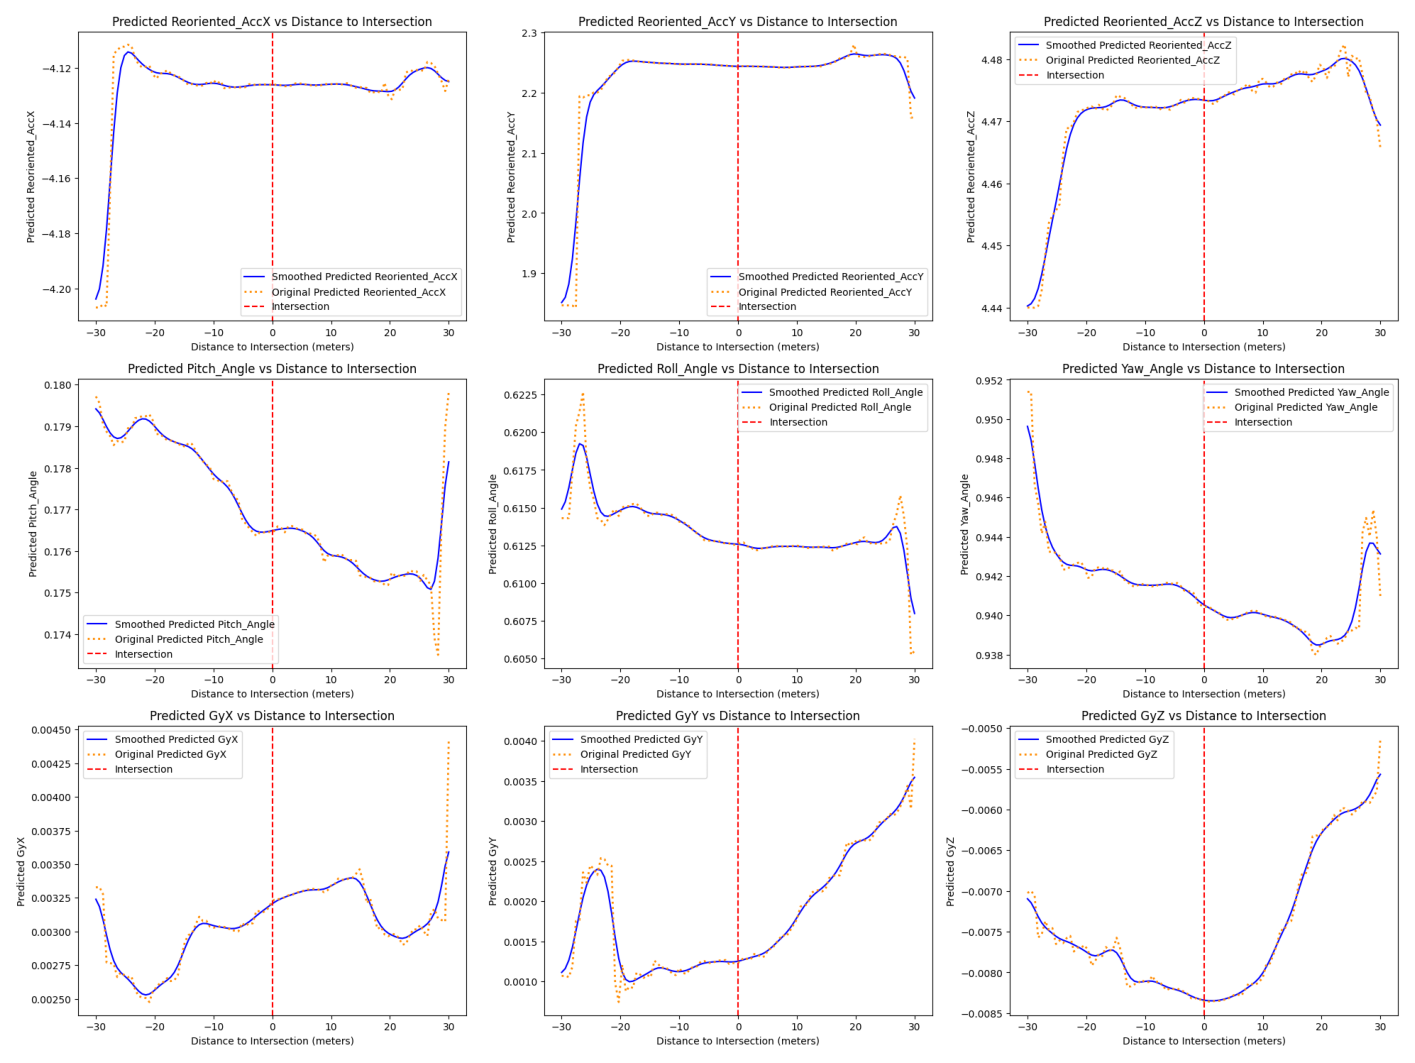

In [60]:
!python src/stages/run_complete_pipeline2.py --config_path=params.yaml --save_dir=output

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img_path = "output/output_plot_target_13.png"
img = mpimg.imread(img_path)
plt.figure(figsize=(18, 18))
plt.imshow(img)
plt.axis('off')
plt.show()


The acceleration fluctuations along the X and Y axes show significant changes as the vehicle approaches the intersection, indicating large movements in the lateral and longitudinal directions (i.e., vehicle acceleration, braking, or steering). In contrast, the fluctuations along the Z-axis are much smaller, suggesting that there is little vertical motion (such as bumps or ramps) near the intersection.

### Changes in Angles (Pitch, Roll, and Yaw) with Distance:

- **Pitch Angle** shows small fluctuations as the vehicle approaches the intersection, indicating slight forward or backward tilting movements as the vehicle nears the intersection.
- **Roll Angle** and **Yaw Angle** also exhibit similar fluctuations around the 0-meter mark (near the intersection), especially the **Roll Angle**, which suggests that the vehicle may be tilting side to side as it approaches the intersection, possibly related to steering actions.

### Changes in Gyroscope Data (GyX, GyY, GyZ) with Distance:

- The gyroscope data mainly reflects the angular velocity of the vehicle. As seen in the graph, the values for **GyX**, **GyY**, and **GyZ** show noticeable fluctuations as the vehicle nears the intersection. This could indicate that the vehicle is making turns or performing acceleration and deceleration maneuvers near the intersection, leading to significant changes in angular velocity along different axes.

## Predict road speed and acceleration between two intersections

In [61]:

from data_processing import assign_segments, extract_segments_between_intersections, remove_proximity_points
from proximity_analysis import calculate_nearest_intersections


def main(df_resampled_filtered, intersections_df_new, distance_threshold=0):
    df_resampled_filtered = calculate_nearest_intersections(df_resampled_filtered, intersections_df_new)
    df_with_segments = assign_segments(df_resampled_filtered)
    segments_between_intersections = extract_segments_between_intersections(df_with_segments)
    segments_filtered = remove_proximity_points(segments_between_intersections, distance_threshold=distance_threshold)
    return segments_filtered


segments_filtered = main(df_resampled_filtered, intersections_df_new, distance_threshold=0)


segments_filtered_csv = config['data']['segments_filtered_csv']
file_path4 = os.path.join(config['paths']['main_dir2'], segments_filtered_csv)

segments_filtered.to_csv(file_path4, index=False)
print(f"segments_filtered DataFrame has been saved to {file_path4}")


segments_filtered DataFrame has been saved to data/Generated_data\segments_filtered.csv


['AccX', 'AccY', 'AccZ', 'acceleration_magnitude', 'gyroscope_magnitude', 'acceleration', 'Pitch_Angle', 'Roll_Angle', 'Yaw_Angle', 'Reoriented_AccX', 'Reoriented_AccY', 'Reoriented_AccZ'] speed_kmh
Mean Squared Error: 397.4860672926763
R^2 Score: 0.5402861721818544


C:\Users\98551\capstone\src\visualization.py:370: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_actual_value = combined_df.groupby('distance_bin')[f'actual_{target_name}'].mean().reset_index(drop=True)
C:\Users\98551\capstone\src\visualization.py:371: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_predicted_value = combined_df.groupby('distance_bin')[f'predicted_{target_name}'].mean().reset_index(drop=True)


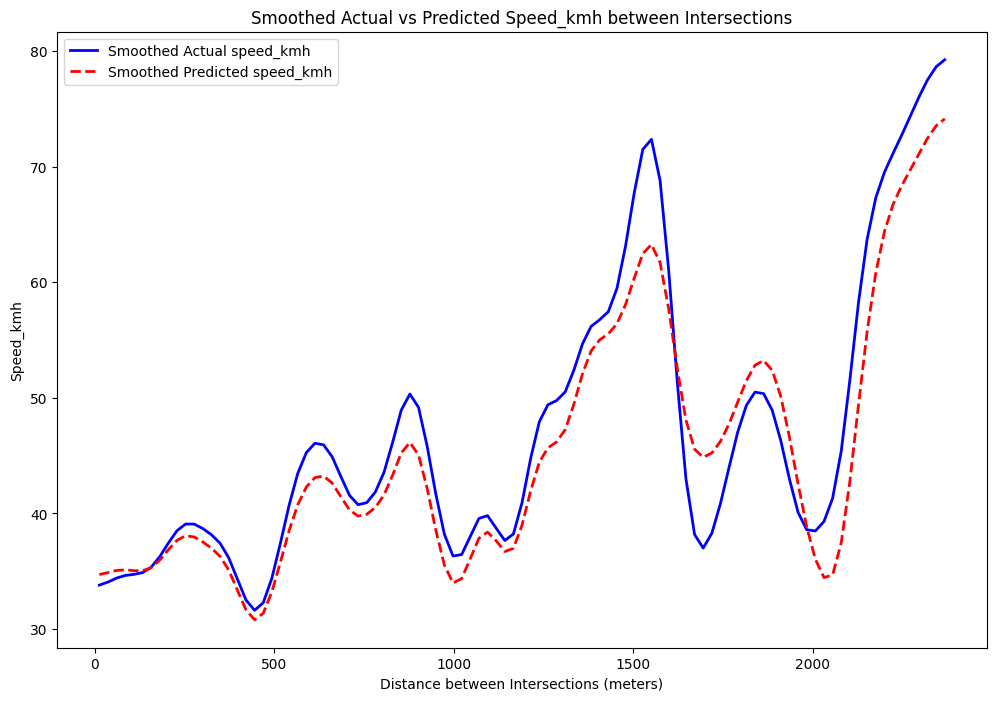

In [62]:
from feature_engineering import calculate_cumulative_distance
from model_training import predict_segment_values
from visualization import  plot_comparison
from features_and_targets1 import features_and_targets
import matplotlib.pyplot as plt
import datetime
from data_split import data_split
from model_training import train_and_evaluate_model, predict_segment_values
print(features_and_targets[13]['features'], features_and_targets[13]['target'])


def main(df, features, target, save_path= f'output/output_plot_{datetime.datetime.now().strftime('%Y%m%d_%H%M%S')}.png'):
    X_train_scaled, X_test_scaled, X_train, X_test, y_train, y_test, scaler = data_split(df, features, target)
    model = train_and_evaluate_model(X_train_scaled, y_train, X_test_scaled, y_test)
    df_with_cumulative = calculate_cumulative_distance(df)
    combined_df = predict_segment_values(df_with_cumulative, features, model, scaler, target)
    plot_comparison(combined_df,target, save_path)

main(segments_filtered, features_and_targets[13]['features'], features_and_targets[13]['target'], save_path= f'output/output_plot_target_14.png')


The graph shows the variation in vehicle speed between two intersections with the longest distance. When the distance is shorter, there are more training samples, so the fitting is better, and the predicted (red) and actual (blue) speed curves are closer. As the distance increases, the number of samples decreases, leading to some bias in the model's fit, especially in areas with peaks and valleys in acceleration and deceleration. Thus, the distribution of sample sizes can indeed affect the prediction performance of the model.

['speed_kmh', 'AccX', 'AccY', 'AccZ', 'acceleration_magnitude', 'gyroscope_magnitude', 'Pitch_Angle', 'Roll_Angle', 'Yaw_Angle', 'Reoriented_AccX', 'Reoriented_AccY', 'Reoriented_AccZ'] acceleration
Mean Squared Error: 23.672797149428348
R^2 Score: 0.22664596757303168


C:\Users\98551\capstone\src\visualization.py:370: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_actual_value = combined_df.groupby('distance_bin')[f'actual_{target_name}'].mean().reset_index(drop=True)
C:\Users\98551\capstone\src\visualization.py:371: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_predicted_value = combined_df.groupby('distance_bin')[f'predicted_{target_name}'].mean().reset_index(drop=True)


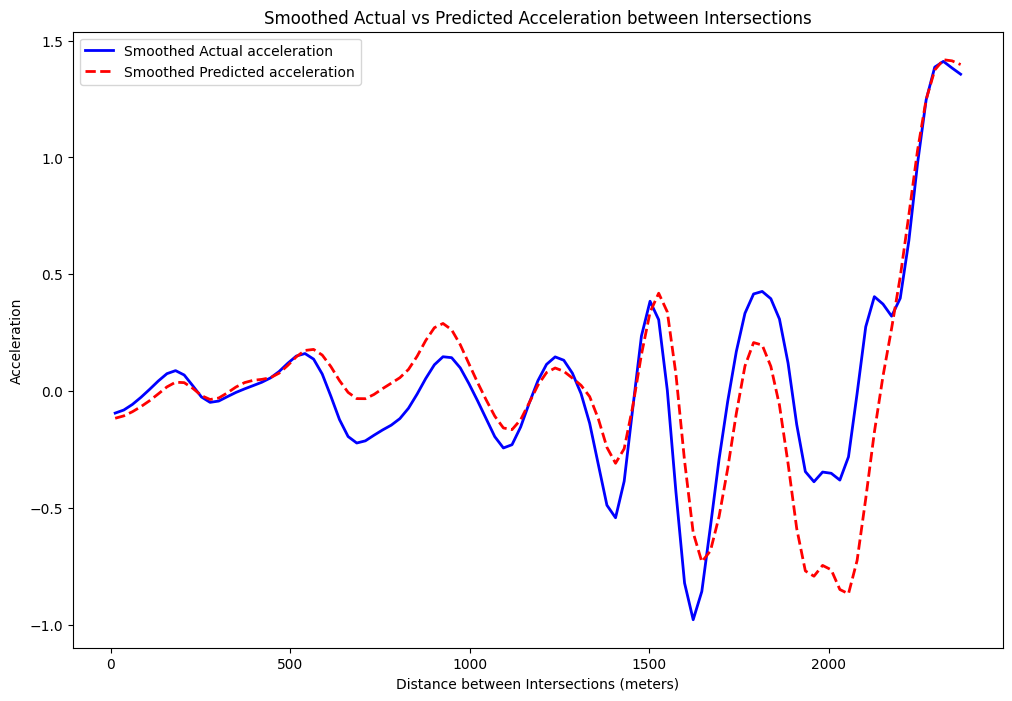

In [63]:
import matplotlib.pyplot as plt
from visualization import plot_comparison
from features_and_targets1 import features_and_targets
print(features_and_targets[14]['features'], features_and_targets[14]['target'])
main(segments_filtered, features_and_targets[14]['features'], features_and_targets[14]['target'], save_path= f'output/output_plot_target_15.png')


The graph shows that predicted acceleration matches actual acceleration well for shorter distances between intersections, but deviates as the distance increases, likely due to fewer data points for larger distances.